In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,Input,LSTM,Dropout

In [40]:
train_df=pd.read_csv("C:/Users/DELL/Downloads/archive (9)/Google_Stock_Price_Train.csv")
test_df=pd.read_csv("C:/Users/DELL/Downloads/archive (10)/Google_Stock_Price_Test.csv")

In [41]:
train_df

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...,...
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"


In [42]:
test_df

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"
5,1/10/2017,807.86,809.13,803.51,804.79,"1,176,800"
6,1/11/2017,805.00,808.15,801.37,807.91,"1,065,900"
7,1/12/2017,807.14,807.39,799.17,806.36,"1,353,100"
8,1/13/2017,807.48,811.22,806.69,807.88,"1,099,200"
9,1/17/2017,807.08,807.14,800.37,804.61,"1,362,100"


In [43]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


In [44]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    20 non-null     object 
 1   Open    20 non-null     float64
 2   High    20 non-null     float64
 3   Low     20 non-null     float64
 4   Close   20 non-null     float64
 5   Volume  20 non-null     object 
dtypes: float64(4), object(2)
memory usage: 1.1+ KB


In [45]:
train=train_df.loc[:,['Open']].values

In [46]:
train.shape

(1258, 1)

In [47]:
scaler=MinMaxScaler()

In [48]:
train_scaled=scaler.fit_transform(train)

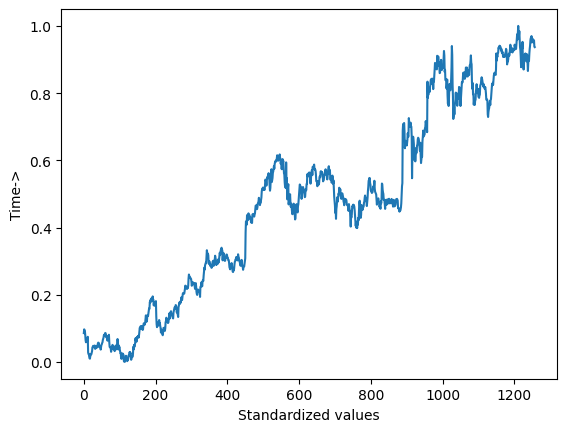

In [49]:
plt.plot(train_scaled)
plt.xlabel("Standardized values")
plt.ylabel("Time->")
plt.show()

In [50]:
train_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [51]:
x_train=[]
y_train=[]
time=60
for i in range(60,train_scaled.shape[0]):
    x_train.append(train_scaled[i-60:i,0])
    y_train.append(train_scaled[i,0])
x_train=np.array(x_train)
y_train=np.array(y_train)

In [52]:
x_train.shape

(1198, 60)

In [53]:
y_train.shape

(1198,)

In [54]:
x_train=np.reshape(x_train,newshape=(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1198, 60, 1)

In [55]:
model = Sequential([
    Input(shape=(x_train.shape[1], 1)),
    LSTM(100, activation='tanh', return_sequences=True), Dropout(0.3),
    LSTM(100, activation='tanh'), Dropout(0.3),
    Dense(1)
])

model.compile(optimizer='adam', loss='mae')
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 60, 100)             │          40,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 60, 100)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 100)                 │          80,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 121,301 (473.83 KB)

 Trainable params: 121,301 (473.83 KB)

 Non-trainable params: 0 (0.00 B)

In [56]:
model.fit(x_train,y_train,epochs=100,batch_size=50,validation_split=0.05)

Epoch 1/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 7s 155ms/step - loss: 0.2036 - val_loss: 0.0300
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 125ms/step - loss: 0.0463 - val_loss: 0.0243
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 117ms/step - loss: 0.0441 - val_loss: 0.0237
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 145ms/step - loss: 0.0443 - val_loss: 0.0512
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 113ms/step - loss: 0.0415 - val_loss: 0.0275
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 117ms/step - loss: 0.0368 - val_loss: 0.0236
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 122ms/step - loss: 0.0394 - val_loss: 0.0459
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 122ms/step - loss: 0.0409 - val_loss: 0.0223
Epoch 9/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step - loss: 0.0402 - val_loss: 0.0215
Epoch 10/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 103ms/step - loss: 0.0365 - val_loss: 0.0353
Epoch 11/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 99ms/step - loss: 0.0390 - val_loss: 0.0264
Epoch 12/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s

In [74]:
data=pd.concat((train_df["Open"],test_df["Open"]),axis=0)

In [75]:
test=data.iloc[len(data)-len(test_df)-time:].values

In [76]:
test.shape

(80,)

In [77]:
test=test.reshape(-1,1)

In [78]:
test.shape

(80, 1)

In [79]:
test_scaled=scaler.transform(test)

In [81]:
x_test=[]
for i in range(60,test_scaled.shape[0]):
    x_test.append(test_scaled[i-60:i,0])
x_test=np.array(x_test)
x_test.shape


(20, 60)

In [82]:
x_test=np.reshape(x_test,newshape=(x_test.shape[0],x_test.shape[1],1))
x_test.shape

(20, 60, 1)

In [83]:
y_test=test_df.loc[:,"Open"].values

In [84]:
y_pred=model.predict(x_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


In [85]:
y_pred=scaler.inverse_transform(y_pred)

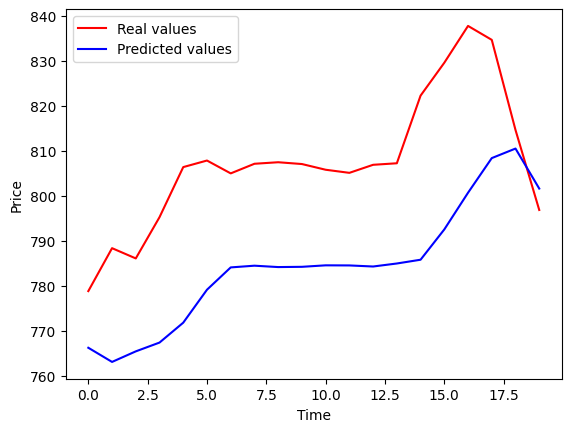

In [88]:
plt.plot(y_test,color='red',label='Real values')
plt.plot(y_pred,color='blue',label='Predicted values')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()